# Normal model for basketball scores

In [1]:
import pandas as pd, numpy as np, scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
bball = pd.read_csv('data/basketball.csv')
bball.head()

,Year,Winner,ScoreW,Loser,ScoreL,Combined
0,1939,OREGON,56,TEXAS,41,97
1,1939,OKLAHOMA,50,UTAHSTATE,39,89
2,1939,VILLANOVA,42,BROWN,30,72
3,1939,OHIOSTATE,64,WAKEFOREST,52,116
4,1939,OREGON,55,OKLAHOMA,37,92


### Known variance

In [3]:
prior_mean = 192
prior_sd = .017
sigma = 14
mean_draws = sp.stats.norm.rvs(prior_mean, prior_sd, 10000) # generates values of theta
prior_predictions = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws]) # use the thetas to generate scores

In [4]:
min(prior_predictions)

137.59898786211232

In [5]:
def posterior_params(data, prior_mean, prior_sd, sigma):
    xbar = data['Combined'].mean()
    prior_prec = 1 / prior_sd ** 2
    data_prec = len(data) / sigma ** 2
    post_mean = (prior_mean * prior_prec + xbar * data_prec) / (prior_prec + data_prec)
    post_sd = np.sqrt(1/(prior_prec + data_prec))
    return post_mean, post_sd

In [6]:
post_mean, post_sd = posterior_params(bball, 192, 0.5, 14)
post_mean, post_sd

(158.77710843373492, 0.2805616856196708)

In [7]:
mean_draws = sp.stats.norm.rvs(post_mean, post_sd, 1000)
post_predictions = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws])

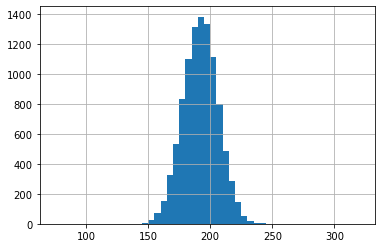

In [8]:
prior_predictions.hist(bins = range(75, 325, 5))

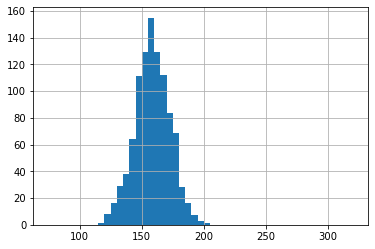

In [9]:
post_predictions.hist(bins = range(75, 325, 5))

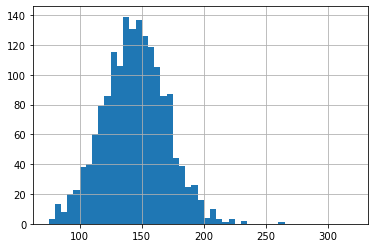

In [10]:
bball['Combined'].hist(bins = range(75, 325, 5))